# Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df = pd.read_csv('Data/multiTimeline.csv', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


# Prep

In [5]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [6]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

In [7]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


# EDA

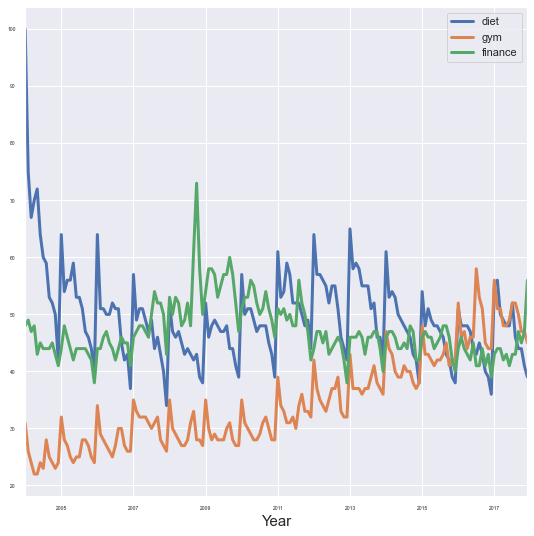

In [18]:
df.plot(figsize=(9,9), linewidth=3, fontsize=5)
plt.xlabel('Year', fontsize=15);

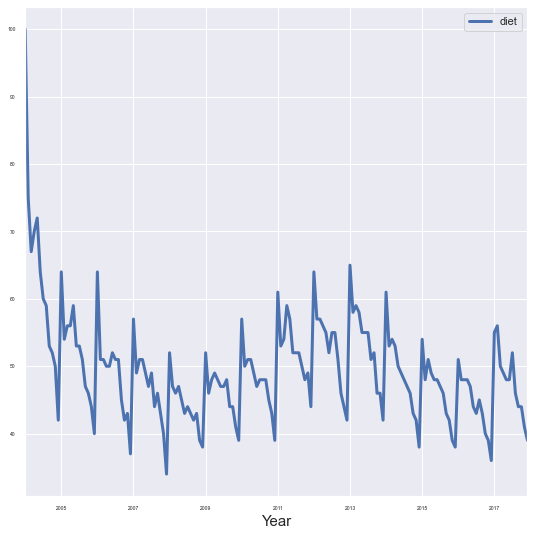

In [19]:
df[['diet']].plot(figsize=(9,9), linewidth=3, fontsize=5)
plt.xlabel('Year', fontsize=15);

# Trends and Seasonality in Time Series Data

There are several ways to think about **identifying trends** in time series. One popular way is by taking a *rolling average*, which means that, for each time point, you take the average of the points on either side of it. Note that the number of points is specified by a window size, which you need to choose.

When it comes to determining the window size, here, it makes sense to first try out one of twelve months, as you're talking about yearly seasonality.

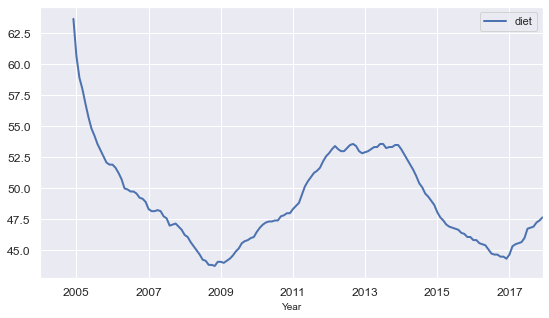

In [32]:
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(9,5), linewidth=2, fontsize=12)
plt.xlabel('Year', fontsize=10);

You can also plot the rolling average of 'gym' using built-in pandas methods with the same window size as you took for the 'diet' data:

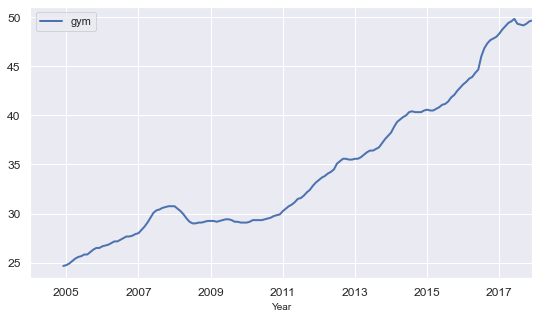

In [31]:
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(9,5), linewidth=2, fontsize=12)
plt.xlabel('Year', fontsize=10);

You have successfully removed the seasonality and you see an upward trend for "gym"! But how do these two search terms compare? 

You can figure this out by plotting the trends of 'gym' and 'diet' on a single figure:

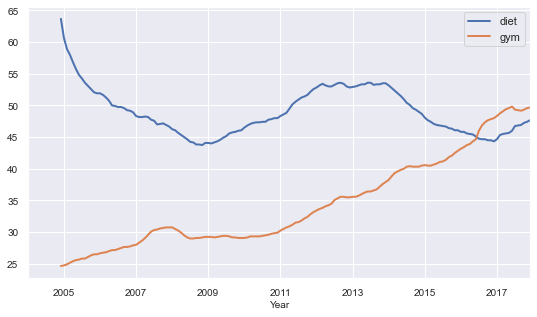

In [30]:
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(9,5), linewidth=2, fontsize=10)
plt.xlabel('Year', fontsize=10);

# Seasonal Patterns in Time Series Data

One way to think about the seasonal components to the time series of your data is to **remove the trend** from a time series, so that you can more easily investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over.

Another way to remove the trend is called "differencing", where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).

## First-order differencing

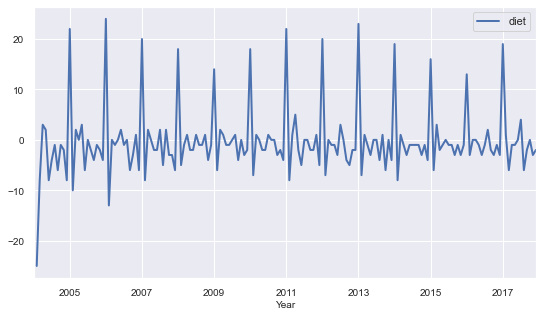

In [29]:
diet.diff().plot(figsize=(9,5), linewidth=2, fontsize=10)
plt.xlabel('Year', fontsize=10);

See that you have removed much of the trend and you can really see the peaks in January every year. Each January, there is a huge spike of 20 or more percent on the highest search item you've seen!

Note: you can also perform 2nd order differencing, which means that you would be looking at the difference between one data point and the two that precede it, if the trend is not yet entirely removed. See here (https://otexts.com/fpp2/stationarity.html) for more on differencing.

Differencing is super helpful in turning your time series into a stationary time series. You won't get too much into these here but a stationary time series is one whose statistical properties (such as mean and variance) don't change over time. These time series are useful because many time series forecasting methods are based on the assumption that the time series is approximately stationary.

## Periodicity and Autocorrelation

A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months.

Another way to think of this is that if the time series has a peak somewhere, then it will have a peak 12 months after that and, if it has a trough somewhere, it will also have a trough 12 months after that.

Yet another way of thinking about this is that the time series is correlated with itself shifted by 12 months. That means that, if you took the time series and moved it 12 months backwards or forwards, it would map onto itself in some way.

Considering the correlation of a time series with such a shifted version of itself is captured by the concept of autocorrelation. 

To start off, plot all your time series again to remind yourself of what they look like:

Then, compute the correlation coefficients of all of these time series with the help of .corr():

In [14]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.100764,-0.034639
gym,-0.100764,1.000000,-0.284279
finance,-0.034639,-0.284279,1.000000


Let's focus on 'diet' and 'gym'; They are negatively correlated. That's very interesting! Remember that you have a seasonal and a trend component. From the correlation coefficient, 'diet' and 'gym' are negatively correlated. However, from looking at the times series, it looks as though their seasonal components would be positively correlated and their trends negatively correlated.

The actual correlation coefficient is actually capturing both of those.

What you want to do now is plot the first-order differences of these time series and then compute the correlation of those because that will be the correlation of the seasonal components, approximately. Remember that removing the trend may reveal correlation in seasonality.

Start off by plotting the first-order differences with the help of .diff() and .plot():

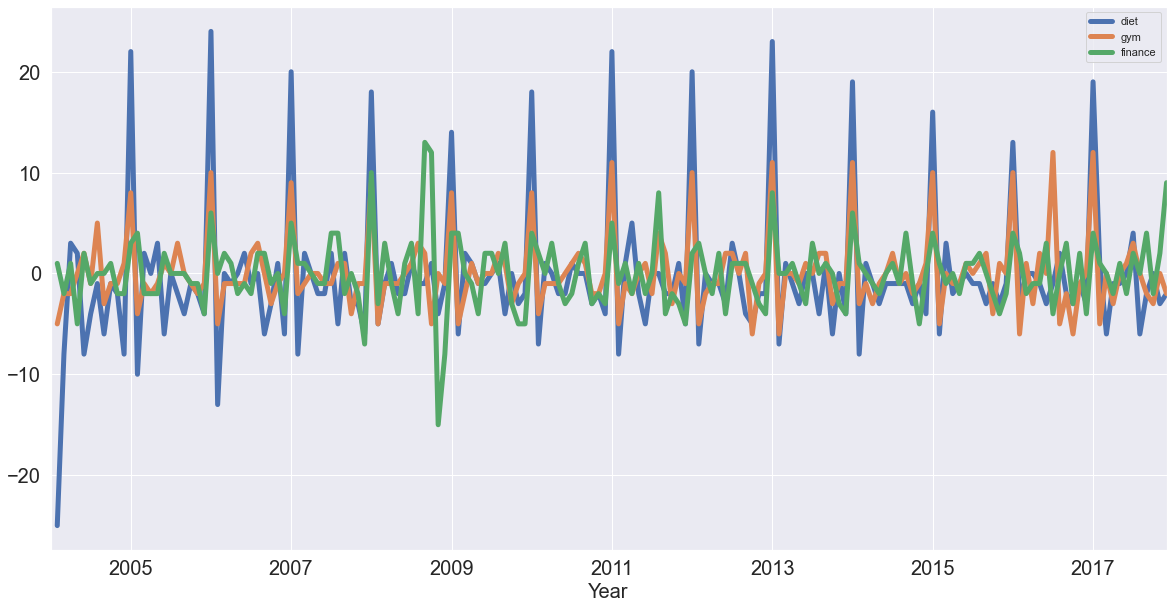

In [15]:
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

You see that 'diet' and 'gym' are incredibly correlated once you remove the trend. Now, you'll compute the correlation coefficients of the first-order differences of these time series:

In [16]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.758707,0.373828
gym,0.758707,1.000000,0.301111
finance,0.373828,0.301111,1.000000


Note that once again, there was a slight negative correlation when you were thinking about the trend and the seasonal component. Now, you can see that with the seasonal component, 'diet' and 'gym' are highly correlated, with a coefficient of 0.76. 

## Autocorrelation

Now you've taken a dive into correlation of variables and correlation of time series, it's time to plot the autocorrelation of the 'diet' series: on the x-axis, you have the lag and on the y-axis, you have how correlated the time series is with itself at that lag. 

So, this means that if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.

Here, you'll look at the plot and what you should expect to see here is a spike in the autocorrelation function at 12 months: the time series is correlated with itself shifted by twelve months.

Use the plotting interface of pandas, which has the autocorrelation_plot() function. You can use this function to plot the time series 'diet':

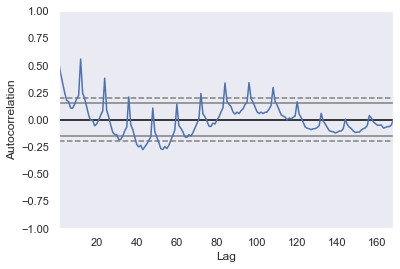

In [17]:
pd.plotting.autocorrelation_plot(diet);

If you included more lags in your axes, you'd see that it is 12 months at which you have this huge peak in correlation. You have another peak at a 24 month interval, where it's also correlated with itself. You have another peak at 36, but as you move further away, there's less and less of a correlation.

# Use ARIMA for Time Series Forecasting